# Simple analytics

In [4]:
from aux import connect_to_db
from sql_queries import (
    AVG_POINTS_BY_PLAYER_QUERY, COUNT_GAMES_PER_TOURNAMENT_QUERY, 
    WINS_PER_SURFACE_QUERY, CURRENT_PRE_MATCH_ATP_RANKINGS_QUERY,
    LAST_X_MATCHES
)

In [2]:
def execute_and_print_query(query, row_limit=10):
    conn = connect_to_db()
    if conn is None:
        return

    try:
        cur = conn.cursor()
        cur.execute(query)

        # Fetch all results
        results = cur.fetchall()

        # Print top rows up to the specified limit
        for idx, row in enumerate(results[:row_limit]):
            print(f"Row {idx + 1}: {row}")

        cur.close()
        conn.close()
        print("Database connection closed.")
    except Exception as e:
        print(f"Error during DB operation: {e}")

In [3]:
execute_and_print_query(AVG_POINTS_BY_PLAYER_QUERY, row_limit=5)

Error connecting to database: could not translate host name "db" to address: Name or service not known



In [5]:
execute_and_print_query(COUNT_GAMES_PER_TOURNAMENT_QUERY, row_limit=10)

Connection to database established.
Row 1: (32, 'French Open', 127)
Row 2: (39, 'Wimbledon', 127)
Row 3: (5, 'Australian Open', 127)
Row 4: (51, 'US Open', 127)
Row 5: (28, 'Mutua Madrid Open', 95)
Row 6: (29, "Internazionali BNL d'Italia", 95)
Row 7: (20, 'Miami Open', 95)
Row 8: (19, 'BNP Paribas Open', 95)
Row 9: (49, 'Western & Southern Financial Group Masters', 55)
Row 10: (48, 'Canadian Open', 55)
Database connection closed.


In [6]:
execute_and_print_query(CURRENT_PRE_MATCH_ATP_RANKINGS_QUERY, row_limit=10)

Connection to database established.
Row 1: (53, 'Sinner J.', 1, 9360)
Row 2: (60, 'Djokovic N.', 2, 7460)
Row 3: (86, 'Alcaraz C.', 3, 7360)
Row 4: (85, 'Zverev A.', 4, 7035)
Row 5: (63, 'Medvedev D.', 5, 6275)
Row 6: (30, 'Rublev A.', 6, 4805)
Row 7: (76, 'Hurkacz H.', 7, 4055)
Row 8: (82, 'Ruud C.', 8, 3855)
Row 9: (5, 'Dimitrov G.', 9, 3655)
Row 10: (75, 'De Minaur A.', 10, 3435)
Database connection closed.


In [7]:
execute_and_print_query(WINS_PER_SURFACE_QUERY, row_limit=10)

Connection to database established.
Row 1: (53, 'Sinner J.', 'Hard', 36)
Row 2: (30, 'Rublev A.', 'Hard', 26)
Row 3: (11, 'Thompson J.', 'Hard', 25)
Row 4: (5, 'Dimitrov G.', 'Hard', 25)
Row 5: (56, 'Baez S.', 'Clay', 23)
Row 6: (85, 'Zverev A.', 'Hard', 23)
Row 7: (82, 'Ruud C.', 'Clay', 22)
Row 8: (63, 'Medvedev D.', 'Hard', 22)
Row 9: (101, 'Darderi L.', 'Clay', 21)
Row 10: (29, 'Tiafoe F.', 'Hard', 21)
Database connection closed.


In [5]:
execute_and_print_query(LAST_X_MATCHES, row_limit=10)

Error connecting to database: could not translate host name "db" to address: Name or service not known



In [16]:
execute_and_print_query("""
                        SELECT
                        --m.match_id,
                        --m.tournament_id,
                        m.date,
                        m.round,
                        --m.best_of,
                        w.name AS winner_name,
                        l.name AS loser_name,
                        m.winner_rank,
                        m.loser_rank,
                        m.winner_pts,
                        m.loser_pts,
                        m.winner_sets,
                        m.loser_sets,
                        m.comments
                        FROM matches m
                        JOIN players w ON m.winner_id = w.player_id
                        JOIN players l ON m.loser_id = l.player_id
                        ORDER BY m.date DESC
                        LIMIT 10
                        """, row_limit=5)

Connection to database established.
Row 1: (datetime.date(2024, 9, 8), 'The Final', 'Sinner J.', 'Fritz T.', 1, 12, 9360, 3120, 3, 0, 'Completed')
Row 2: (datetime.date(2024, 9, 7), 'Semifinals', 'Fritz T.', 'Tiafoe F.', 12, 20, 3120, 2120, 3, 2, 'Completed')
Row 3: (datetime.date(2024, 9, 6), 'Semifinals', 'Sinner J.', 'Draper J.', 1, 25, 9360, 1695, 3, 0, 'Completed')
Row 4: (datetime.date(2024, 9, 5), 'Quarterfinals', 'Sinner J.', 'Medvedev D.', 1, 5, 9360, 6275, 3, 1, 'Completed')
Row 5: (datetime.date(2024, 9, 4), 'Quarterfinals', 'Tiafoe F.', 'Dimitrov G.', 20, 9, 2120, 3655, 2, 1, 'Retired')
Database connection closed.


# 2 Part Quick Checks

In [72]:
from etl import extract_data_from_excel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
URL = "http://tennis-data.co.uk/2024/20234.xlsx"
df = extract_data_from_excel(URL)
df.tail(3)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
2338,55,Tokyo,Japan Open Tennis Championships,2024-09-30,ATP500,Outdoor,Hard,Semifinals,3,Humbert U.,Machac T.,18,34.0,2370,1374.0,6.0,3.0,3.0,6.0,6.0,2.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,1.57,2.38,1.63,2.45,1.63,2.48,1.57,2.37
2339,55,Tokyo,Japan Open Tennis Championships,2024-09-30,ATP500,Outdoor,Hard,Semifinals,3,Fils A.,Rune H.,24,14.0,1775,2780.0,7.0,6.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,2.20,1.67,2.20,1.76,2.23,1.76,2.16,1.69
2340,55,Tokyo,Japan Open Tennis Championships,2024-10-01,ATP500,Outdoor,Hard,The Final,3,Fils A.,Humbert U.,24,18.0,1775,2370.0,5.0,7.0,7.0,6.0,6.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,2.38,1.57,2.33,1.68,2.50,1.68,2.33,1.59


In [5]:
player = "Sinner J."

In [35]:
df['bet_correct'] = df['AvgW'] < df['AvgL']

In [36]:
filtered_ddf = df[(df['Winner'] == player) | (df['Loser'] == player)]
filtered_ddf.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL,bet_correct
114,5,Melbourne,Australian Open,2024-01-14,Grand Slam,Outdoor,Hard,1st Round,5,Sinner J.,Van De Zandschulp B.,4,59.0,6490,890.0,6.0,4.0,7.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN,3.0,0.0,Completed,1.06,10.0,1.06,13.90,1.08,15.96,1.05,10.80,True
176,5,Melbourne,Australian Open,2024-01-17,Grand Slam,Outdoor,Hard,2nd Round,5,Sinner J.,De Jong J.,4,161.0,6490,393.0,6.0,2.0,6.0,2.0,6.0,2.0,NaN,NaN,NaN,NaN,3.0,0.0,Completed,1.02,21.0,1.02,27.16,1.03,28.00,1.02,17.56,True
209,5,Melbourne,Australian Open,2024-01-19,Grand Slam,Outdoor,Hard,3rd Round,5,Sinner J.,Baez S.,4,29.0,6490,1435.0,6.0,0.0,6.0,1.0,6.0,3.0,NaN,NaN,NaN,NaN,3.0,0.0,Completed,1.03,17.0,1.02,27.15,1.03,30.00,1.02,17.61,True
226,5,Melbourne,Australian Open,2024-01-21,Grand Slam,Outdoor,Hard,4th Round,5,Sinner J.,Khachanov K.,4,15.0,6490,2430.0,6.0,4.0,7.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN,3.0,0.0,Completed,1.08,8.0,1.13,7.23,1.13,8.20,1.10,7.22,True
233,5,Melbourne,Australian Open,2024-01-23,Grand Slam,Outdoor,Hard,Quarterfinals,5,Sinner J.,Rublev A.,4,5.0,6490,5010.0,6.0,4.0,7.0,6.0,6.0,3.0,NaN,NaN,NaN,NaN,3.0,0.0,Completed,1.20,4.5,1.22,4.85,1.24,4.85,1.21,4.42,True


In [45]:
# Initialize confusion matrix counts
true_wins = len(df[(df['Winner'] == player) & (df['bet_correct'])])  # True Wins
false_wins = len(df[(df['Loser'] == player) & (df['bet_correct'])])   # False Wins
false_losses = len(df[(df['Winner'] == player) & (~df['bet_correct'])])  # False Losses
true_losses = len(df[(df['Loser'] == player) & (~df['bet_correct'])])   # True Losses

# Create a confusion matrix as a DataFrame
confusion_matrix = pd.DataFrame({
    'Bets Correctly Predicted (Wins)': [true_wins, false_wins],
    'Bets Incorrectly Predicted (Losses)': [false_losses, true_losses]
}, index=['Actual Wins', 'Actual Losses'])

# Display the confusion matrix
print(f"Confusion Matrix for player '{player}':")
print(confusion_matrix)

Confusion Matrix for player 'Sinner J.':
               Bets Correctly Predicted (Wins)  Bets Incorrectly Predicted (Losses)
Actual Wins                                 59                                    1
Actual Losses                                2                                    5


In [38]:
filtered_ddf["bet_correct"].value_counts()

bet_correct
True     61
False     6
Name: count, dtype: int64

now let's simulate for this player games i alawys bet on the one with least 

<Axes: >

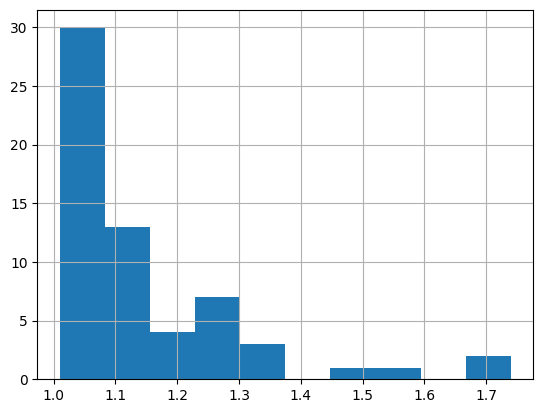

In [64]:
filtered_ddf[filtered_ddf["bet_correct"]]["AvgW"].hist()

<Axes: >

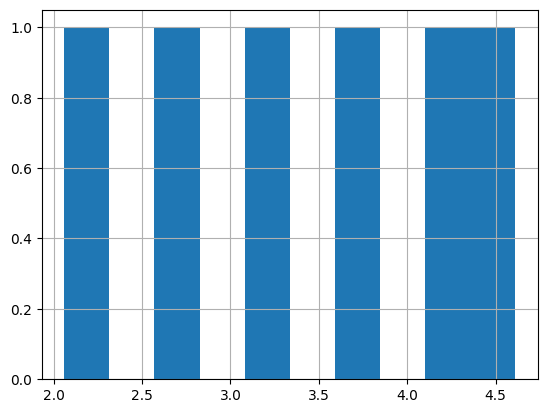

In [65]:
filtered_ddf[~filtered_ddf["bet_correct"]]["AvgW"].hist()

In [92]:
import pandas as pd

def simulate_bets(df, starting_amount, bet_amount, player_name):
    """
    Simulate betting on games for a specific player.

    Parameters:
    - df (pd.DataFrame): DataFrame with game results, odds, and dates.
    - starting_amount (float): Initial amount available for betting.
    - bet_amount (float): Fixed amount to bet on each game.
    - player_name (str): Name of the player to simulate bets for.

    Returns:
    - pd.DataFrame: DataFrame with match results and current amounts after each bet, ordered by date.
    """
    
    # Sort the DataFrame by Date to process older dates first
    df = df.sort_values(by='Date')
    
    current_amount = starting_amount
    results = []

    # Simulate betting
    for index, row in df.iterrows():
        # Determine the bet (smallest of AvgW and AvgL)
        best_odds = min(row['AvgW'], row['AvgL'])
        
        # Determine the selection (your selection)
        if best_odds == row['AvgW']:
            selection = 'Win'
        else:
            selection = 'Loss'
        
        # Check if the player is a winner or loser
        if best_odds == row['AvgW'] and row['Winner'] == player_name:
            # Win scenario: add the winnings to the current amount
            winnings = bet_amount * row['AvgW'] - bet_amount
            current_amount += winnings
            results.append({
                'Date': row['Date'],
                'Winner': row['Winner'],
                'Loser': row['Loser'],
                'Best_Odds': row['AvgW'],
                'Selection': selection,
                'Match_Result': winnings,
                'Current_Amount': current_amount
            })
        elif best_odds == row['AvgL'] and row['Loser'] == player_name:
            # Loss scenario: subtract the bet amount from the current amount
            current_amount -= bet_amount
            results.append({
                'Date': row['Date'],
                'Winner': row['Winner'],
                'Loser': row['Loser'],
                'Best_Odds': row['AvgL'],
                'Selection': selection,
                'Match_Result': -bet_amount,
                'Current_Amount': current_amount
            })
        else:
            # If neither condition is met, consider it a loss
            current_amount -= bet_amount
            results.append({
                'Date': row['Date'],
                'Winner': row['Winner'],
                'Loser': row['Loser'],
                'Best_Odds': best_odds,
                'Selection': selection,
                'Match_Result': -bet_amount,
                'Current_Amount': current_amount
            })

    # Create a results DataFrame
    results_df = pd.DataFrame(results)

    return results_df

# Sample DataFrame Creation
data = {
    'Date': pd.date_range(start='2024-01-01', periods=5, freq='D'),
    'Winner': ['Sinner J', 'Player A', 'Sinner J', 'Player B', 'Sinner J'],
    'Loser': ['Player B', 'Sinner J', 'Player C', 'Sinner J', 'Player D'],
    'AvgW': [2.5, 1.5, 3.0, 2.0, 1.8],
    'AvgL': [1.8, 2.2, 2.5, 1.9, 2.1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Example Usage
starting_amount = 100  # Initial amount
bet_amount = 10        # Amount to bet on each game
player_name = 'Sinner J'  # Name of the player to bet on

# Simulate betting
results_df = simulate_bets(df, starting_amount, bet_amount, player_name)

# Display the results DataFrame
results_df


,Date,Winner,Loser,Best_Odds,Selection,Match_Result,Current_Amount
0,2024-01-01,Sinner J,Player B,1.8,Loss,-10.0,90.0
1,2024-01-02,Player A,Sinner J,1.5,Win,-10.0,80.0
2,2024-01-03,Sinner J,Player C,2.5,Loss,-10.0,70.0
3,2024-01-04,Player B,Sinner J,1.9,Loss,-10.0,60.0
4,2024-01-05,Sinner J,Player D,1.8,Win,8.0,68.0


In [88]:

# Example Usage
starting_amount = 100  # Initial amount
bet_amount = 10        # Amount to bet on each game
player_name = 'Sinner J'  # Name of the player to bet on

# Simulate betting
results_df = simulate_bets(df, starting_amount, bet_amount, player_name)

# Display the results DataFrame
results_df

,Date,Match_Result,Current_Amount
0,2023-12-31,-10,90
1,2023-12-31,-10,80
2,2024-01-01,-10,70
3,2024-01-01,-10,60
4,2024-01-01,-10,50
...,...,...,...
2336,2024-09-29,-10,-23270
2337,2024-09-29,-10,-23280
2338,2024-09-30,-10,-23290
2339,2024-09-30,-10,-23300
